<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW2_GD_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (pro)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание - 10.

## Часть 1 (теоретическая)

## Задание 1 (**1.5 балла**)

В случае одномерной Ridge-регрессии минимизируется функция со штрафом:
$$Q(w) = (y-xw)^T(y-xw)+\lambda w^2,$$
где $\lambda$ - положительный параметр, штрафующий функцию за слишком большие значения $w$.

1)  (**0.5 балла**) Найдите производную $\nabla_w Q(w)$, выведите формулу для оптимального $w$.

2) (**0.5 балла**) Найдите вторую производную $\nabla^2_w Q(w)$. Убедитесь, что мы оказались в точке минимума.

3) (**0.5 балла**) Выпишите шаг градиентного спуска в матричном виде.

## 1)  (**0.5 балла**) Найдите производную $\nabla_w Q(w)$, выведите формулу для оптимального $w$.  
<br>

$$
Q(w) = (y - Xw)^T(y - Xw) + \lambda w^2
$$

<br>

### Производная первой части

<br>

$$
(y - Xw)^T(y - Xw) = y^Ty - 2y^TXw + w^TX^TXw
$$

$$
\nabla_w(y - Xw)^T(y - Xw) = -2X^Ty + 2X^TXw
$$

<br>

### Производную второй части

<br>

$$
\nabla_w(\lambda w^2) = 2\lambda w
$$

<br>

### Полная производная

<br>

$$
\nabla_w Q(w) = (-2X^Ty + 2X^TXw) + 2\lambda w
$$

$$
\nabla_w Q(w) = 2X^TXw - 2X^Ty + 2\lambda w
$$

<br>

### Оптимальное значение $ w $

<br>

$$
2X^TXw - 2X^Ty + 2\lambda w = 0
$$

$$
(X^TX + \lambda I)w - X^Ty = 0
$$

$$
(X^TX + \lambda I)w = X^Ty
$$

$$
w = (X^TX + \lambda I)^{-1}X^Ty
$$

<br>

## 2) (**0.5 балла**) Найдите вторую производную $\nabla^2_w Q(w)$. Убедитесь, что мы оказались в точке минимума.

   $$
   \nabla_w(2X^TXw) = 2X^TX
   $$

   $$
   \nabla_w(-2X^Ty) = 0
   $$

   $$
   \nabla_w(2\lambda w) = 2\lambda I
   $$

   <br>

  $$
  \nabla^2_w Q(w) = 2X^TX + 2\lambda I
  $$

### Убедимся, что мы находимся в точке минимума

<center> $ 2X^TX > 0$ - квадрат нормы вектора </center>

<center> $ 2\lambda I > 0 $ - по условию </center>

Поэтому:

$$ 2X^TX + 2\lambda I > 0 $$

Из чего следует, что функция выпукла вверх и найденная точка  действительно является точкой минимума.


## 3) (**0.5 балла**) Выпишите шаг градиентного спуска в матричном виде.

$$w^{(t+1)} = w^{(t)} - \eta(-2x^Ty + 2w^{(t)}x^Tx + 2\lambda w^{(t)})$$
$$w^{(t+1)} = w^{(t)} + 2\eta x^Ty - 2\eta w^{(t)}x^Tx - 2\eta\lambda w^{(t)}
$$
$$w^{(t+1)} = w^{(t)}(1 - 2\eta(x^Tx + \lambda)) + 2\eta x^Ty$$





## Часть 2 (практическая).

## Задание 2 (**1 балл**)

Дана функция: $$f(x) = x\cdot sin(5x) + 0.1 \cdot x^2$$

Для этой функции:

- [ ] Реализуйте (или возьмите рассмотренный на занятии) метод градиетного спуска с условием остановки `stop=1e^-6` и шагом `eta=0.001`. **Градиетный спуск обязательно должен сохранять траекторию движения.**
- [ ] Задайте стартовые точки x0, равные 0, 0.5, 1
- [ ] Реализуйте нахождение точек минимума и максимума функции $f(x)$ (для нахождения максимума нам нужно в направлении градиента, а не антиградиента)
- [ ] Проанализируйте результаты. Предположите, с чем они связаны. Ответьте на вопросы:
    - Чему равны значения экстремумов?
    - При старте из какой начальной точки найденные экстремумы совпадут?




In [70]:
import numpy as np

In [71]:
# Функция и её производная
def f(x):
    return x * np.sin(5*x) + 0.1 * x**2

def df(x):
    return np.sin(5*x) + 5*x*np.cos(5*x) + 0.2*x

# Градиентный спуск
def gradient_descent(f, df, x0, eta, max_iter=1000, tol=1e-6):
    x = x0
    path = [x0]

    for _ in range(max_iter):
        x_new = x - eta * df(x)

        path.append(x_new)

        if abs(x_new - x) < tol:
            break

        x = x_new

    return x, path

# Поиск экстремумов
def find_points(f, df, x0, eta, max_iter=1000, tol=1e-6):
    def df_neg(x):
        return -df(x)

    x_min, min_path = gradient_descent(f, df, x0, eta, max_iter, tol)
    x_max, max_path = gradient_descent(f, df_neg, x0, eta, max_iter, tol)

    return x_min, f(x_min), x_max, f(x_max)

In [72]:
x0_points = [0, 0.5, 1]
eta = 0.001

for x0 in x0_points:
    x_min, f_min, x_max, f_max = find_points(f, df, x0, eta)
    print(f"\nДля x0 = {x0}:")
    print(f"Минимум: x = {x_min:.6f}, f(x) = {f_min:.6f}")
    print(f"Максимум: x = {x_max:.6f}, f(x) = {f_max:.6f}")


Для x0 = 0:
Минимум: x = 0.000000, f(x) = 0.000000
Максимум: x = 0.000000, f(x) = 0.000000

Для x0 = 0.5:
Минимум: x = 0.975061, f(x) = -0.867075
Максимум: x = 0.411857, f(x) = 0.380650

Для x0 = 1:
Минимум: x = 0.975138, f(x) = -0.867075
Максимум: x = 1.603529, f(x) = 1.839232


При старте из 0 найденные экстремумы совпали, т.к. в этой точке производная равна 0 и алгоритм сразу останавливается.



## Задание 3 (**0.5 балла**).
Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
def ols_solution(X, y):
    X, y = np.array(X), np.array(y)
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [75]:
X = [[1, 0], [0, 1]]
y = [2, 3]

ols_solution(X, y)

array([2., 3.])

In [76]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X, y)
lr.coef_

array([2., 3.])

## Задание 5 (**1 балл**).
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [77]:
import random

In [78]:
def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

In [79]:
def stochastic_gradient_descent(X, y, learning_rate, iterations):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    m = X.shape[0]

    cost_track = np.zeros((iterations, 1))

    for i in range(iterations):
        idx = np.random.randint(0, m)

        X_batch = X[idx]
        y_batch = y[idx]

        params = params - 2 * learning_rate * ((X_batch @ params - y_batch) * X_batch)

        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

## Задание 6 (**3 балла**).
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию на данных, сгенерированных ниже, тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**):

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации.

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [80]:
def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

In [81]:
def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params

In [82]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

X, y, _ = make_regression(n_samples=100000,#number of samples
                          n_features=10,#number of features
                          n_informative=8,#number of useful features
                          noise=100,#bias and standard deviation of the guassian noise
                          coef=True,#true coefficient used to generated the data
                          random_state=123)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

In [83]:
from sklearn.metrics import r2_score

### Аналитическая формула

In [84]:
w_ols = ols_solution(X, y)
y_pred_ols = X @ w_ols

r2_score_ols = r2_score(y, y_pred_ols)
r2_score_ols

0.7554626185750483

In [85]:
%%time
w_ols = ols_solution(X, y)

CPU times: user 16.7 ms, sys: 0 ns, total: 16.7 ms
Wall time: 13.7 ms


### Градиентный спуск

In [86]:
track_grad, w_grad = gradient_descent(X, y, 0.01, 10_000)
y_pred_grad = predict(X, w_grad)

r2_score_grad = r2_score(y, y_pred_grad)
r2_score_grad

0.7554626185750483

In [87]:
%%time
gradient_descent(X, y, 0.01, 10_000)

CPU times: user 21.5 s, sys: 3.98 s, total: 25.5 s
Wall time: 14.5 s


(array([[38078.2547103 ],
        [36043.59801261],
        [34196.85128419],
        ...,
        [ 9982.20353127],
        [ 9982.20353127],
        [ 9982.20353127]]),
 array([-0.63834148, 56.82455793, 33.48291813, -0.24065452, 39.64529367,
        -0.13585617, 49.12295947, 13.9223821 , 42.89807286, 79.20386231,
        42.4712069 , 55.7219869 ]))

### Стохастический градиентный спуск

In [88]:
track_stoch_grad, w_stoch_grad = stochastic_gradient_descent(X, y, 0.01, 10_000)
y_pred_stoch_grad = predict(X, w_stoch_grad)

r2_score_stoch_grad = r2_score(y, y_pred_stoch_grad)
r2_score_stoch_grad

0.6771085427212049

In [89]:
%%time
stochastic_gradient_descent(X, y, 0.01, 10_000)

CPU times: user 9.33 s, sys: 2.66 s, total: 12 s
Wall time: 7.71 s


(array([[39940.04361896],
        [39698.71367817],
        [34150.75129606],
        ...,
        [11681.80275243],
        [11577.72700737],
        [11540.62382418]]),
 array([-12.61843157,  86.15550319,  22.62534533,   0.42067383,
         40.04701624,  17.9720181 ,  51.93601978,  15.84058281,
         40.94280935,  72.62764862,  35.59785963,  56.08905426]))

1) Стохастический градиентный спуск не нашел минимум, а нашел близкую к нему точку. Это произошло из-за того, что мы рандомили объект для вычисления градиента

2) Самым быстрым оказалось решение с помощью формулы, а самым медленным - градиентный спуск

4) Самым успешным оказалось решение с помощью формулы и градиентный спуск

In [90]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'loss')

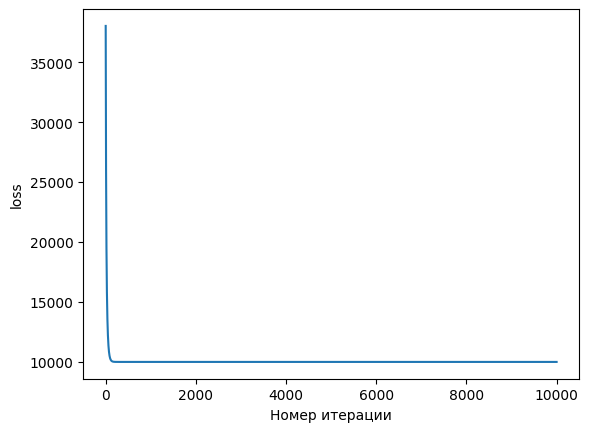

In [91]:
plt.plot(track_grad)
plt.xlabel('Номер итерации')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

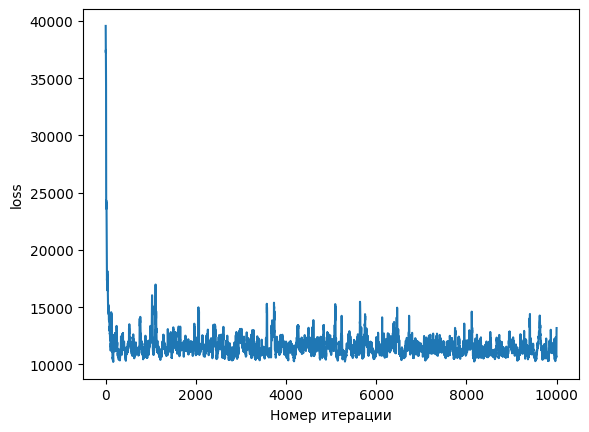

In [92]:
plt.plot(track_stoch_grad)
plt.xlabel('Номер итерации')
plt.ylabel('loss')

## Задание 7 (1.5 балла).

* **(0.5 балла)**. Добавьте в функцию из задания 5 L2-регуляризацию и, соответственно, новый аргумент - коэффициент при регуляризаторе.

* **(1 балл)**. На сгенерированных выше данных обучите модифицированный алгоритм SGD с регуляризацией: в цикле перебирайте значения коэффициента регуляризации от 0.1 до 1 с шагом 0.1. Для каждого значения обучите модель и сделайте предсказание, выведите значение r2. Для какого значения коэффициента регуляризации получилось наилучшее качество r2, почему?

In [93]:
def compute_cost_l2(X, y, theta, lambda_reg):
    m = len(y)
    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2) + lambda_reg * np.sum(theta[1:]**2)
    return cost

In [94]:
def stochastic_gradient_descent_l2(X, y, learning_rate, iterations, lambda_reg=0.1):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    m = X.shape[0]

    cost_track = np.zeros((iterations, 1))

    for i in range(iterations):
        idx = np.random.randint(0, m)

        X_batch = X[idx]
        y_batch = y[idx]

        gradient = 2 * learning_rate * ((X_batch @ params - y_batch) * X_batch)
        reg_term = 2 * lambda_reg * learning_rate * params
        reg_term[0] = 0

        params = params - gradient - reg_term

        cost_track[i] = compute_cost_l2(X, y, params, lambda_reg)

    return cost_track, params

In [104]:
learning_rate = 0.01
iterations = 1000
lambdas = np.arange(0.1, 1.1, 0.1)

r2_scores = []

for lambda_reg in lambdas:
    cost_track, w = stochastic_gradient_descent_l2(X, y, learning_rate, iterations, lambda_reg)
    y_pred = predict(X, w)
    r2 = r2_score(y, y_pred)
    r2_scores.append(r2)
    print(f"Коэффициент регуляризации λ = {lambda_reg:.1f}, R² = {r2:.4f}")

Коэффициент регуляризации λ = 0.1, R² = 0.7263
Коэффициент регуляризации λ = 0.2, R² = 0.6833
Коэффициент регуляризации λ = 0.3, R² = 0.7019
Коэффициент регуляризации λ = 0.4, R² = 0.6910
Коэффициент регуляризации λ = 0.5, R² = 0.6602
Коэффициент регуляризации λ = 0.6, R² = 0.6898
Коэффициент регуляризации λ = 0.7, R² = 0.6650
Коэффициент регуляризации λ = 0.8, R² = 0.6060
Коэффициент регуляризации λ = 0.9, R² = 0.6116
Коэффициент регуляризации λ = 1.0, R² = 0.6120


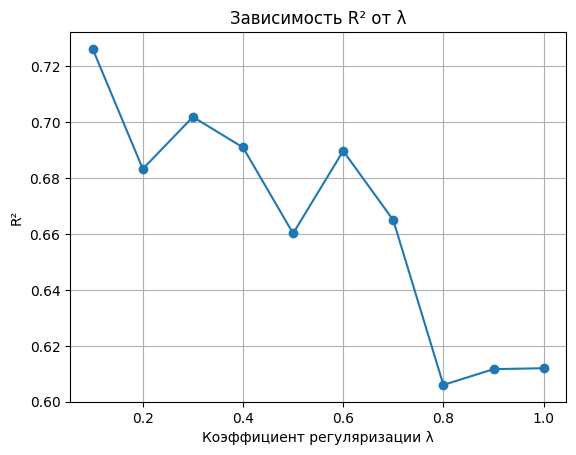

In [105]:
plt.plot(lambdas, r2_scores, marker='o')
plt.grid(True)
plt.xlabel("Коэффициент регуляризации λ")
plt.ylabel("R²")
plt.title("Зависимость R² от λ")
plt.show()

Лучшее качество модель показала при λ = 0.1. Скорее всего модель просто переобучилась. Но чем больше коэффициент - тем больше шанс недообучения.

## Задание 8 (2 балла)

Реализуйте на выбор одну из оптимизаций градиентного спуска - Momentum или  AdaGrad. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

### AdaGrad

In [106]:
def modified_grad_descent(X, y, learning_rate, iterations, lambda_reg=0.1, epsilon=1e-8, batch_size = 32): # добавьте в аргументы также специфические для метода оптимизации гиперпараметры
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    m = X.shape[0]
    cost_track = np.zeros((iterations, 1))

    sum_squares = np.zeros_like(params)

    for i in range(iterations):
        idx = np.random.choice(m, batch_size)
        X_batch = X[idx]
        y_batch = y[idx]

        predictions = X_batch @ params
        errors = predictions - y_batch
        gradient = (2.0/batch_size) * (X_batch.T @ errors)

        reg_term = 2 * lambda_reg * params
        reg_term[0] = 0

        full_gradient = gradient + reg_term

        sum_squares += full_gradient**2

        params = params - learning_rate * full_gradient / (np.sqrt(sum_squares + epsilon))

        cost_track[i] = compute_cost_l2(X, y, params, lambda_reg)

    return cost_track, params

In [107]:
learning_rate = 1
iterations = 5000
lambdas = np.arange(0.1, 1.1, 0.1)

r2_scores = []

for lambda_reg in lambdas:
    cost_track, w = modified_grad_descent(X, y, learning_rate, iterations, lambda_reg)
    y_pred = predict(X, w)
    r2 = r2_score(y, y_pred)
    r2_scores.append(r2)
    print(f"Коэффициент регуляризации λ = {lambda_reg:.1f}, R² = {r2:.4f}")

Коэффициент регуляризации λ = 0.1, R² = 0.7498
Коэффициент регуляризации λ = 0.2, R² = 0.7407
Коэффициент регуляризации λ = 0.3, R² = 0.7290
Коэффициент регуляризации λ = 0.4, R² = 0.7158
Коэффициент регуляризации λ = 0.5, R² = 0.7023
Коэффициент регуляризации λ = 0.6, R² = 0.6861
Коэффициент регуляризации λ = 0.7, R² = 0.6713
Коэффициент регуляризации λ = 0.8, R² = 0.6579
Коэффициент регуляризации λ = 0.9, R² = 0.6451
Коэффициент регуляризации λ = 1.0, R² = 0.6298


## Бонус

## Задание 9 (0.5 балла)

Существует [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Известно, что методы второго порядка точнее, чем методы первого порядка (то есть те, которые используют только первую производную для оптимизации). Как вы думаете, почему в оптимизации функций потерь все формулы используют только производные первого порядка? Почему не используют метод Ньютона?

1) Вычислительная сложность - метод Ньютона требует вычисления матрицы вторых производных. Квадратичная сложность неприменима к моделям с множеством параметров. Также гессиан может быть плохо обусловленным.

2) Сложность при работе с мини батчами. Гессиан, посчитанный на мини батче, может плохо описывать реальный.

3) Методы первого порядка дают приемлемую точность, тратя меньше времени и памяти

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/qxjz2tp)

Ставлю вторую производную, что это кот Яны